In [28]:
import numpy as np

In [225]:
import pandas as pd

In [182]:
import matplotlib.pyplot as pp

## 0. Sampling from Poisson Distribution

In [254]:
%%latex
\begin{align}
\text{Average succes rate per unit of time} \space \lambda = \frac{1}{40} \\
\end{align}

<IPython.core.display.Latex object>

In [173]:
lambda_ = 1/40
N = 100

In [174]:
#waiting time between two events is given by the exp. distribution.
#the cumulitative exp. distribution compute is used to compute the probability of 
#an occurence of an events within the next x units of times.

#source: https://preshing.com/20111007/how-to-generate-random-timings-for-a-poisson-process/ 
def F(x):
    return 1 - np.exp(x/40*-lambda_)

In [175]:
#after 40mins we highly expect a succes.
print(F(40))
#after 2secs, we are less likely to have any succes.
print(F(0.2))

0.0246900879717
0.000124992187825


In [176]:
#random points from the y-axis (probabilities)
Y = np.random.uniform(size=N)

In [177]:
#corresponding x-values, waiting times
T = -np.log(1-Y) / lambda_

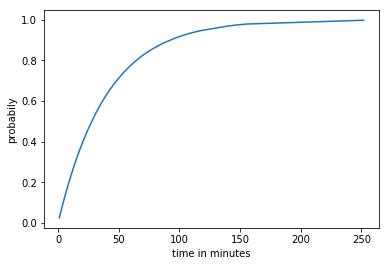

Text(0,0.5,'probabily')

In [199]:
pp.plot(T[np.argsort(T)], Y[np.argsort(T)])
pp.show()
pp.xlabel('time in minutes')
pp.ylabel('probabily')

In [181]:
#notice how the observed average rate is almost equal to lambda_
print(T.mean())

40.7359999055


In [205]:
#we sampled waiting times, the corresponding time serie is:
Ts = np.cumsum(T)

In [236]:
events = np.repeat('A', N)

In [247]:
sampled_data = pd.DataFrame(data={'time': Ts, 'event': events})

# Sampling from Poisson Nets

![alt text](./PoissonNets_examples.PNG)

## a. Sampling from a Single Node Poisson Nets

### Model description

In [264]:
%%latex
\begin{align}
nodes = A \\
w_{A,0} = \frac{1}{40} \\
\lambda_{A}(t) = exp(w_{A,0}) = exp(\frac{1}{40}) \\
\end{align}

<IPython.core.display.Latex object>

In [391]:
W0 = 1/40
lambda_ = np.exp(W0)
time_serie_length = 100

The waiting times between two adjecents events are iid and distributed exponentially with rate lambda

In [403]:
lambda_

1.0253151205244289

In [452]:
def sample_from_poisson(lambda_, N):
    Y = np.random.uniform(size=N)
    X_waitingTimes = -np.log(1-Y) / lambda_
    Time_serie = np.cumsum(X_waitingTimes)
    return Time_serie, X_waitingTimes, Y

In [456]:
A_time_serie, waiting_times, probs = sample_from_poisson(lambda_, 100)

In [458]:
#sampled data
A_time_serie

array([   1.52049252,    2.48906064,    3.36438648,    4.96517294,
          5.30945603,    5.46890582,    6.41612751,    7.41798703,
         10.28345217,   12.01170362,   12.15196162,   13.03132223,
         14.49105345,   15.34328662,   15.5350295 ,   16.15938638,
         16.66537109,   17.46448481,   18.422718  ,   21.42655134,
         22.63476184,   23.96148939,   25.55272795,   25.72174189,
         25.74684359,   27.54494793,   32.41949314,   33.5504318 ,
         34.3105335 ,   34.79942266,   36.27801627,   38.07045539,
         38.21086502,   38.45708312,   39.02655181,   39.13605995,
         39.57196233,   39.96434309,   40.98828783,   42.76965313,
         42.77461085,   44.92654893,   48.90822658,   49.74931345,
         49.9484575 ,   50.37898765,   50.59471224,   51.15221824,
         53.64408755,   54.5616974 ,   56.55444174,   56.98743287,
         57.44006091,   57.86622531,   58.23348297,   58.97204661,
         61.39493171,   62.11690058,   62.60187262,   66.04594

## Likelihood

In [504]:
%%latex
\begin{align}
\text{general formula:} \space
\mathcal{L}(\textbf{W}, M \mid T) = p(T \mid W, M) = \prod_{i=1}^{V} p(\textbf{t}_i \mid \{ \textbf{t}_j \mid j \in \pi(i)\})
\end{align}

<IPython.core.display.Latex object>

In [559]:
%%latex
\begin{align}
\text{general formula:} \space
\mathcal{L}(W_{A,0}, {A} \mid Sampled Data) = p(\textbf{t}_A) \\
= \prod_{l=1}^{100} p(t_{l} \mid t_{l-1}, W_{A,0}, M) \\
= \prod_{l=1}^{100} \lambda_{l, 1} \times exp(-\lambda_{l, 1} \tau_{l, 1}) \\
\tau_{l, 1} = t_{l} - t_{l-1}, \space (k{_l} = 0) \\
\lambda_{l, 1} = exp(W_{A, 0}), \space \pi(A) = \emptyset \\
\Rightarrow \mathcal{L}(W_{A,0}, {A} \mid Sampled Data) = exp(W_{A, 0})^{100} \times exp(-\lambda_{l, 1} \times (t_1 - t_{100}))
\end{align}

<IPython.core.display.Latex object>

In [571]:
L = (lambda_ ** 100) * np.exp(-lambda_ * (A_time_serie[99] - A_time_serie[0]))

In [572]:
L

1.2026694871619545e-44

**likelihood is very smal ~ 0, which is not normale.**